# **Tree based methods - outcome_damage**

# 0. Mount to drive, loading packages and dataset

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')

df = pd.read_csv('train_V2_cleaned.csv', index_col=[0])

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4912 entries, 1090 to 1304
Data columns (total 57 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   income_am              4912 non-null   float64
 1   profit_last_am         4912 non-null   float64
 2   profit_am              4912 non-null   float64
 3   damage_am              4912 non-null   float64
 4   damage_inc             4912 non-null   float64
 5   crd_lim_rec            4912 non-null   float64
 6   credit_use_ic          4912 non-null   float64
 7   gluten_ic              4912 non-null   float64
 8   lactose_ic             4912 non-null   float64
 9   insurance_ic           4912 non-null   float64
 10  spa_ic                 4912 non-null   float64
 11  empl_ic                4912 non-null   float64
 12  cab_requests           4912 non-null   float64
 13  married_cd             4912 non-null   float64
 14  bar_no                 4912 non-null   float64
 15  s

# 0.1 X/Y-split

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from random import Random

damagers = df[df['outcome_damage_inc'] == 1]

X = damagers.drop(['outcome_profit', 'outcome_damage_amount', 'outcome_damage_inc'], 1)
y_damage = damagers['outcome_damage_amount']



X_train_damage, X_test_damage, y_train_damage, y_test_damage = train_test_split(X, y_damage, test_size=0.2, random_state=123)

__note__: Standardization already happened in pre-processing

In [4]:
X_train_damage.head()

,income_am,profit_last_am,profit_am,damage_am,damage_inc,crd_lim_rec,credit_use_ic,gluten_ic,lactose_ic,insurance_ic,...,client_segment_2.0,client_segment_3.0,client_segment_4.0,client_segment_5.0,sect_empl_0.0,sect_empl_1.0,sect_empl_2.0,sect_empl_3.0,sect_empl_4.0,sect_empl_6.0
3604,0.322059,-1.142158,-0.020669,-0.409033,-0.452286,1.183859,-0.20816,0.0,0.0,1.0,...,0,0,0,0,1,0,0,0,0,0
3553,0.052089,-1.142158,-0.301698,2.516818,2.192479,0.839130,-0.20816,0.0,0.0,0.0,...,1,0,0,0,0,1,0,0,0,0
563,-0.658251,-0.408914,0.217684,1.969304,1.216375,0.870758,-0.20816,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
2638,0.793276,0.532060,0.219685,-0.409033,-0.452286,0.638482,-0.20816,1.0,0.0,1.0,...,0,0,0,0,1,0,0,0,0,0
3187,-0.916414,-1.142158,-0.688244,-0.409033,-0.452286,-1.094296,-0.20816,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0


In [5]:
X_train_damage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1008 entries, 3604 to 578
Data columns (total 54 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   income_am           1008 non-null   float64
 1   profit_last_am      1008 non-null   float64
 2   profit_am           1008 non-null   float64
 3   damage_am           1008 non-null   float64
 4   damage_inc          1008 non-null   float64
 5   crd_lim_rec         1008 non-null   float64
 6   credit_use_ic       1008 non-null   float64
 7   gluten_ic           1008 non-null   float64
 8   lactose_ic          1008 non-null   float64
 9   insurance_ic        1008 non-null   float64
 10  spa_ic              1008 non-null   float64
 11  empl_ic             1008 non-null   float64
 12  cab_requests        1008 non-null   float64
 13  married_cd          1008 non-null   float64
 14  bar_no              1008 non-null   float64
 15  sport_ic            1008 non-null   float64
 16  neig

# 1. Decision trees

We start with a simple decision tree, but use cross-validation with regard to the maximum depth to find the best model. Since there are 1008 observation, the depth can't be higher than 10.

In [6]:
from sklearn.tree import DecisionTreeRegressor  
from sklearn.model_selection import cross_val_score

depth = np.arange(1,11)    # This will give an array of numbers between 1 and 10
cv_scores = []
sd_scores = []
# perform 5-fold cross validation on the  possible values for the radius (bandwith)
for d in depth:
    dec_tree = DecisionTreeRegressor(random_state = 0, max_depth=d)  
    scores = cross_val_score(dec_tree, X_train_damage, y_train_damage,  cv=5)
    cv_scores.append(scores.mean())
    sd_scores.append(np.sqrt(scores.var())/np.sqrt(5))

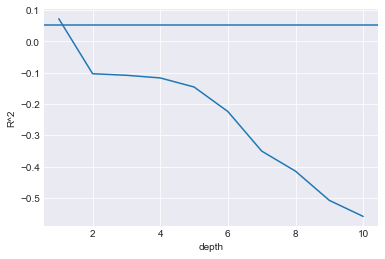

The best depth is 1


In [7]:
max_value = max(cv_scores)
max_index = cv_scores.index(max_value)

plt.plot(depth, cv_scores)
plt.xlabel('depth')
plt.ylabel('R^2')
plt.axhline(y=max_value-1.96*sd_scores[max_index])

plt.show()
print('The best depth is', depth[max_index])

In [8]:
from sklearn import tree 

dec_tree_damage = DecisionTreeRegressor(random_state = 123, max_depth=1)  
dec_tree_damage.fit(X_train_damage, y_train_damage) 
print(dec_tree_damage.score(X_train_damage, y_train_damage))

0.07707708778562616


# 2. Random forest

# 2.1 Random search

In [9]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

criterion =['mse','mae']
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 400)]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(1, 10, num = 10)]
min_samples_split = [int(x) for x in np.linspace(2, 10, num = 9)]
min_samples_leaf = [int(x) for x in np.linspace(1, 10, num = 10)]
max_leaf_nodes = [int(x) for x in np.linspace(10, 500, num = 490)]

random_grid = {'criterion': criterion,
               'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_leaf_nodes': max_leaf_nodes}

rf_damage = RandomForestRegressor()
rf_damage_random = RandomizedSearchCV(estimator = rf_damage, param_distributions = random_grid, n_iter = 500, 
                               cv = 5, verbose=20, random_state=42, n_jobs=-1)
rf_damage_random.fit(X_train_damage, y_train_damage)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=500,
                   n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'max_leaf_nodes': [10, 11, 12, 13, 14,
                                                           15, 16, 17, 18, 19,
                                                           20, 21, 22, 23, 24,
                                                           25, 26, 27, 28, 29,
                                                           30, 31, 32, 33, 34,
                                                           35, 36, 37, 38, 39, ...],
                                        'min_samples_leaf': [1, 2, 3, 

## 2.2 Test best model

In [10]:
print(rf_damage_random.score(X_train_damage, y_train_damage))

0.3939904449335063


## 2.3 Print out the parameters of the best model

In [11]:
rf_damage_random.best_params_

{'n_estimators': 350,
 'min_samples_split': 3,
 'min_samples_leaf': 6,
 'max_leaf_nodes': 401,
 'max_features': 'sqrt',
 'max_depth': 9,
 'criterion': 'mse'}

## 2.4 Plot all the results for the hyperparameters

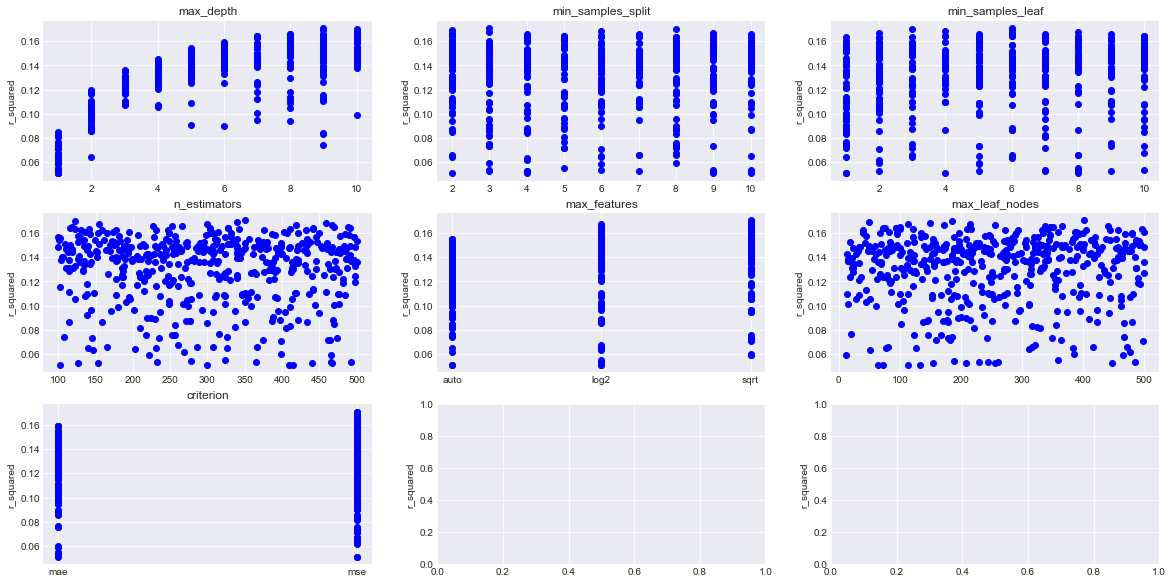

In [12]:
out = pd.DataFrame(rf_damage_random.cv_results_)

xlabel_names = ['param_max_depth','param_min_samples_split','param_min_samples_leaf','param_n_estimators',
                'param_max_features', 'param_max_leaf_nodes', 'param_criterion']

fig, axs = plt.subplots(3,3, figsize=(20,10))

axs[0,0].scatter(out['param_max_depth'], out['mean_test_score'], c='blue');
axs[0,0].set_title('max_depth')

axs[0,1].scatter(out['param_min_samples_split'], out['mean_test_score'], c='blue');
axs[0,1].set_title('min_samples_split')

axs[0,2].scatter(out['param_min_samples_leaf'], out['mean_test_score'], c='blue');
axs[0,2].set_title('min_samples_leaf')

axs[1,0].scatter(out['param_n_estimators'], out['mean_test_score'], c='blue');
axs[1,0].set_title('n_estimators')

axs[1,1].scatter(out['param_max_features'], out['mean_test_score'], c='blue');
axs[1,1].set_title('max_features')

axs[1,2].scatter(out['param_max_leaf_nodes'], out['mean_test_score'], c='blue');
axs[1,2].set_title('max_leaf_nodes')

axs[2,0].scatter(out['param_criterion'], out['mean_test_score'], c='blue');
axs[2,0].set_title('criterion')

for ax in axs.flat:
    ax.set(ylabel='r_squared')

In [13]:
out = out[out.mean_test_score > 0.16]

__note__: Plots downstairs are only the results where the R2 is above 0.16

### 2.4.1 The results for max_depth where R2 is above 0.16

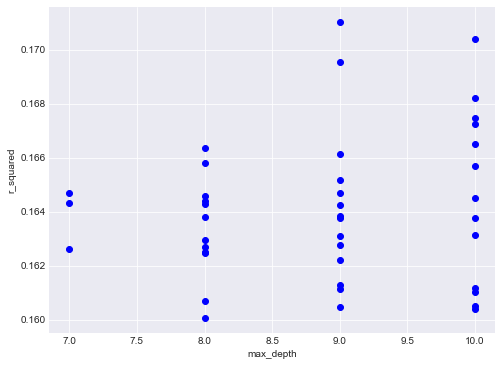

In [14]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(out['param_max_depth'], out['mean_test_score'], c='blue');
ax.set_xlabel("max_depth");
ax.set_ylabel("r_squared");

We can see that the best depth is 8, but 9 and 10 do not perform much worse. So we will perform a organized grid with these values

### 2.4.2 The results for min_samples_split where R2 is above 0.16

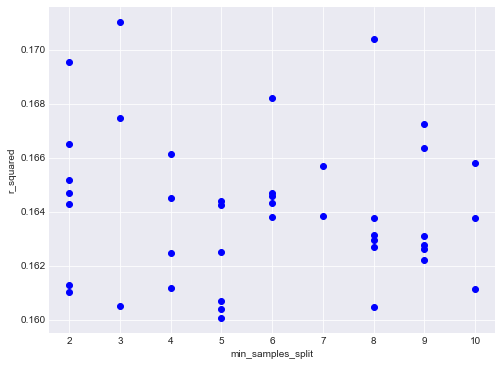

In [15]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(out['param_min_samples_split'], out['mean_test_score'], c='blue');
ax.set_xlabel("min_samples_split");
ax.set_ylabel("r_squared");

We can see that the best value is 3. We going to try also 2 and 8 because we prefer models that are less complex. Here, that means models that have a higher minimum number of samples to allow splitting. So, we chose 3,2 and 8 to go in the grid search.

### 2.4.3 The results for min_samples_leaf where R2 is above 0.16

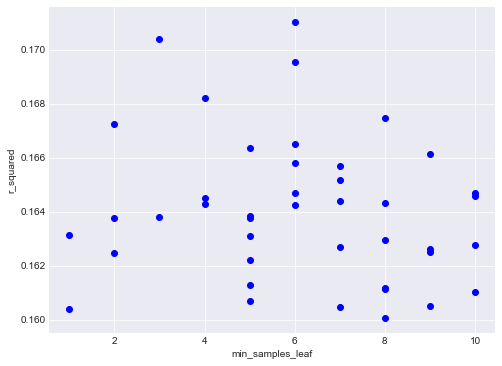

In [16]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(out['param_min_samples_leaf'], out['mean_test_score'], c='blue');
ax.set_xlabel("min_samples_leaf");
ax.set_ylabel("r_squared");

6 leads to the best R2, but we also going to try 3 and 4. So, we chose 3,4 and 6 to go in the grid search.

### 2.4.4 The results for n_estimators where R2 is above 0.16

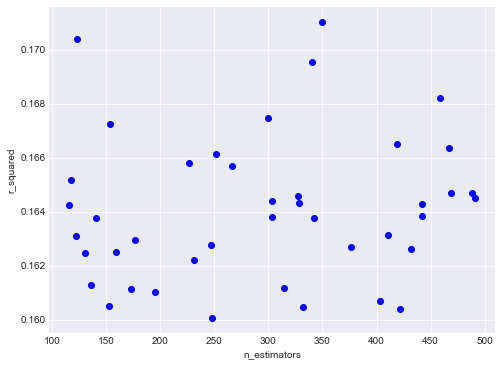

In [17]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(out['param_n_estimators'], out['mean_test_score'], c='blue');
ax.set_xlabel("n_estimators");
ax.set_ylabel("r_squared");

The best value was with 350 trees. We can't clearly see what values the other estimators have, so we go on with only 350. 

### 2.4.5 The results for max_features where R2 is above 0.16

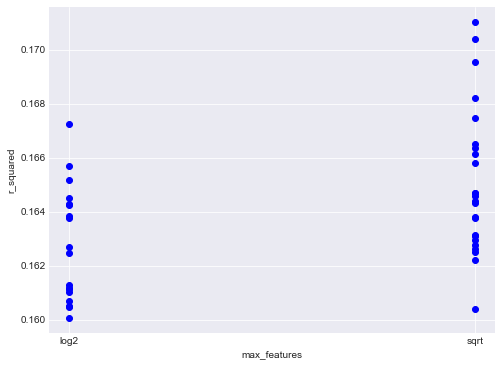

In [18]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(out['param_max_features'], out['mean_test_score'], c='blue');
ax.set_xlabel("max_features");
ax.set_ylabel("r_squared");

We chose log2 and sqrt to add in the grid search.

### 2.4.6 The results for max_leaf_nodes where R2 is above 0.16

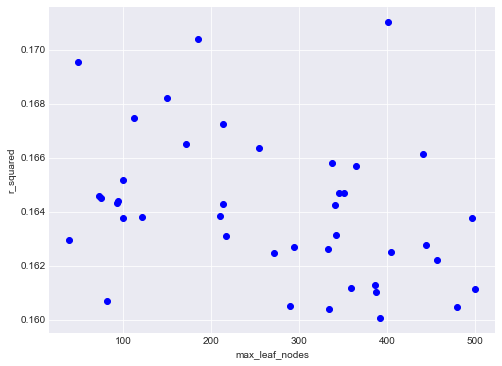

In [19]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(out['param_max_leaf_nodes'], out['mean_test_score'], c='blue');
ax.set_xlabel("max_leaf_nodes");
ax.set_ylabel("r_squared");

The best max_leaf was 401. But all the results looks worse. So, we only chose 401 to add to the grid search.

### 2.4.7 The results for criterion where R2 is above 0.16

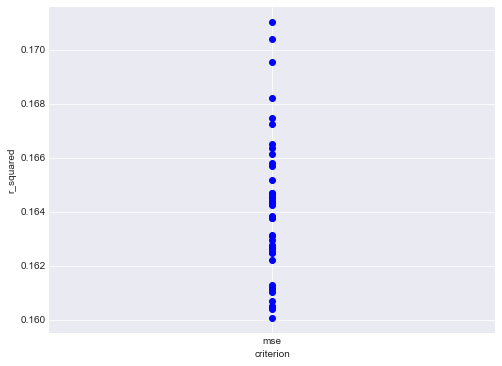

In [20]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(out['param_criterion'], out['mean_test_score'], c='blue');
ax.set_xlabel("criterion");
ax.set_ylabel("r_squared");

Mse has a higher R2. So, we chose to only add 'mse' to the grid search.

## 2.5 Grid search

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

criterion =['mse']
n_estimators = [419]
max_features = ['log2', 'sqrt']
max_depth = [ 8, 9, 10]
min_samples_split = [2,3,8]
min_samples_leaf = [4,3,6]
max_leaf_nodes = [401]

grid = {'criterion': criterion,
               'n_estimators': n_estimators,
               'max_features': max_features,
                'max_leaf_nodes': max_leaf_nodes,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

rf = RandomForestRegressor()
rf_grid = GridSearchCV(estimator = rf, param_grid = grid,
                               cv = 5, verbose=15,  n_jobs=-1)

rf_grid.fit(X_train_damage, y_train_damage)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse'], 'max_depth': [8, 9, 10],
                         'max_features': ['log2', 'sqrt'],
                         'max_leaf_nodes': [401], 'min_samples_leaf': [4, 3, 6],
                         'min_samples_split': [2, 3, 8],
                         'n_estimators': [419]},
             verbose=15)

In [22]:
rf_grid.best_params_

{'criterion': 'mse',
 'max_depth': 10,
 'max_features': 'log2',
 'max_leaf_nodes': 401,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 419}

In [23]:
params = rf_grid.best_params_
rf_gridBest = RandomForestRegressor(**params)
rf_gridBest.fit(X_train_damage, y_train_damage)
print('R2: %.3f' % rf_gridBest.score(X_train_damage, y_train_damage))

R2: 0.436


# 3. Whitening the black box

##  3.1 Which features are important?

In [24]:
list(zip(X_train_damage.columns, rf_gridBest.feature_importances_))

[('income_am', 0.054138144562379184),
 ('profit_last_am', 0.039347971488804125),
 ('profit_am', 0.0852362815427895),
 ('damage_am', 0.04670889144736075),
 ('damage_inc', 0.048577088532979006),
 ('crd_lim_rec', 0.041225988222139555),
 ('credit_use_ic', 0.0037845071330019986),
 ('gluten_ic', 0.0005655852605530835),
 ('lactose_ic', 0.0046766015101721865),
 ('insurance_ic', 0.045086005206409964),
 ('spa_ic', 0.011704446192592394),
 ('empl_ic', 7.326697664799993e-05),
 ('cab_requests', 0.03658777844152662),
 ('married_cd', 0.005137295026842001),
 ('bar_no', 0.05744361334099174),
 ('sport_ic', 0.012928923381333467),
 ('neighbor_income', 0.002163913393323776),
 ('age', 0.04447053004533784),
 ('marketing_permit', 0.03080308190649504),
 ('urban_ic', 0.034752559215535626),
 ('dining_ic', 0.0012903525327740586),
 ('presidential', 0.00030412277096588725),
 ('prev_stay', 0.005132126226170162),
 ('prev_all_in_stay', 0.021479863194012946),
 ('divorce', 0.0023138975553363807),
 ('fam_adult_size', 0.02

This is not easy to read, so it is better to plot this. But first, let's check if the sum of all feature importances is indeed 1.

In [25]:
rf_gridBest.feature_importances_.sum()

1.0

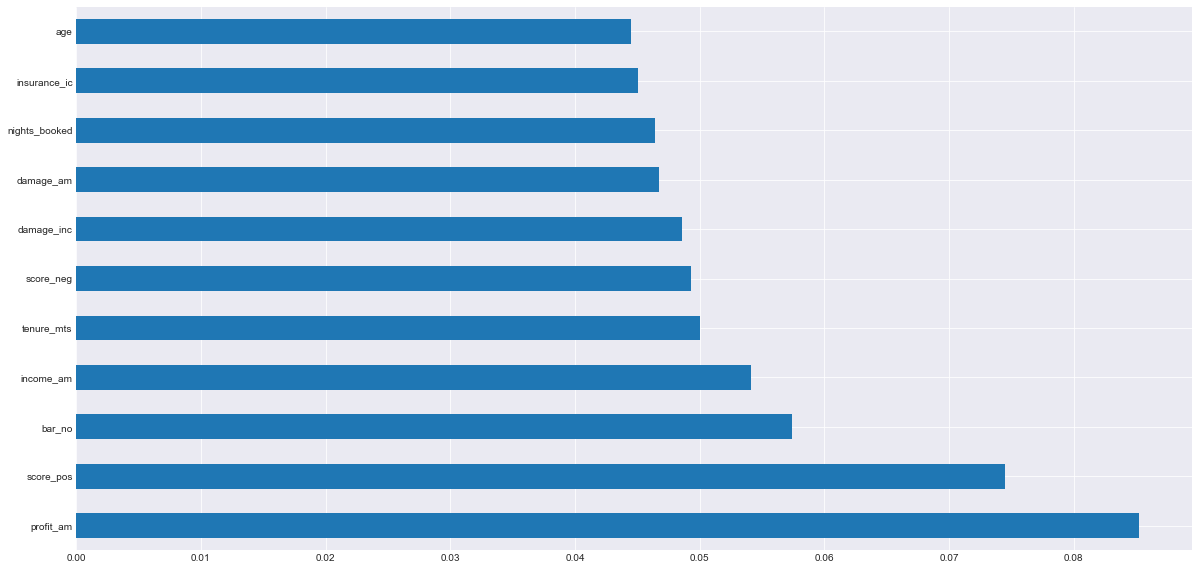

In [26]:
from matplotlib import pyplot as plt

plt.figure(figsize=(20,10))

feat_importances = pd.Series(rf_gridBest.feature_importances_, index=X.columns)
feat_importances.nlargest(11).plot(kind='barh')
plt.show()

## 3.2 What is the influence of a certain feature?

In [27]:
pred_train =rf_gridBest.predict(X_train_damage)

In [28]:
from sklearn.linear_model import LinearRegression

X = pd.DataFrame(X_train_damage)
X.columns = X_train_damage.columns
predictors =  X_train_damage.columns
y = np.array((pred_train-pred_train.mean())/np.sqrt(pred_train.var())).reshape(-1, 1)

reg = LinearRegression(normalize=True).fit(X[[predictors[0]]], y)
beta = pd.Series(reg.coef_[0])
names = pd.Series(predictors[0])
for i in np.arange(1,(X.shape[1])):
    reg = LinearRegression(normalize=True).fit(X[[predictors[i]]], y)
    beta_help = pd.Series(reg.coef_[0])
    names_help = pd.Series(predictors[i])
    beta = pd.concat([beta,beta_help], axis=0)
    names = pd.concat([names,names_help], axis=0)
betas = pd.concat([names,beta],axis=1)
betas

,0,1
0,income_am,0.434412
0,profit_last_am,0.242059
0,profit_am,0.562637
0,damage_am,0.515330
0,damage_inc,0.525559
0,crd_lim_rec,0.504407
0,credit_use_ic,0.223242
0,gluten_ic,0.768304
0,lactose_ic,0.877208
0,insurance_ic,0.966262


## 3.3 Why is a prediction what it is?

In [29]:
import lime
import lime.lime_tabular
from lime.lime_tabular import LimeTabularExplainer

explainer = LimeTabularExplainer(X_train_damage.values, mode="regression", feature_names=X_train_damage.columns)

i = 100
X_train_damage = pd.DataFrame(X_train_damage)
X_train_damage.columns = X_train_damage.columns

X_observation = X_train_damage.iloc[[i], :]

In [30]:
explanation = explainer.explain_instance(X_observation.values[0], rf_gridBest.predict)
explanation.show_in_notebook(show_table=True, show_all=False)

# 4. Gradient boosting

## 4.1 Perform random search

In [31]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor

criterion =['mse','mae']
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 50)]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(1, 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(2, 15, num = 14)]
min_samples_leaf = [int(x) for x in np.linspace(1, 15, num = 15)]
max_leaf_nodes = [int(x) for x in np.linspace(10, 500, num = 50)]
loss = ['ls','lad','huber','quantile']
learning_rate = [round(x,5) for x in np.linspace(0.1, 1, num = 10)]

random_grid = {'criterion': criterion,
               'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_leaf_nodes': max_leaf_nodes,
               'loss': loss,
               'learning_rate': learning_rate}

gbm = GradientBoostingRegressor()
gbm_random = RandomizedSearchCV(estimator = gbm, param_distributions = random_grid, n_iter = 100, 
                               cv = 3, verbose=10, random_state=42, n_jobs=-1)
gbm_random.fit(X_train_damage, y_train_damage)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\pierl\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1630: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='lad' instead.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "


RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'learning_rate': [0.1, 0.2, 0.3, 0.4,
                                                          0.5, 0.6, 0.7, 0.8,
                                                          0.9, 1.0],
                                        'loss': ['ls', 'lad', 'huber',
                                                 'quantile'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'max_leaf_nodes': [10, 20, 30, 40, 50,
                                                           60...
                        

## 4.2 Test best model

In [32]:
print(gbm_random.score(X_train_damage, y_train_damage))

0.46084035087903563


This model has the best R2 score this far, but wee try to incrase this a litle bit further by doing a grid search.

## 4.3 Print out the parameters of the best model

In [33]:
gbm_random.best_params_

{'n_estimators': 328,
 'min_samples_split': 11,
 'min_samples_leaf': 13,
 'max_leaf_nodes': 460,
 'max_features': 'sqrt',
 'max_depth': 3,
 'loss': 'huber',
 'learning_rate': 0.1,
 'criterion': 'mae'}

## 4.4 Plot the results of the hyperparameters

In [34]:
out = pd.DataFrame(gbm_random.cv_results_)
out.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_leaf_nodes,param_max_features,param_max_depth,param_loss,param_learning_rate,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,7.718287,1.058379,0.009626,0.000443,442,10,9,40,sqrt,2,ls,0.8,mae,"{'n_estimators': 442, 'min_samples_split': 10,...",-0.083409,0.018304,0.046651,-0.006151,0.055842,27
1,28.742057,1.811219,0.020865,0.004064,255,4,5,500,sqrt,14,lad,0.4,mae,"{'n_estimators': 255, 'min_samples_split': 4, ...",-0.132527,0.016651,-0.055862,-0.057246,0.060910,42
2,5.548112,0.391898,0.011999,0.001633,214,14,15,330,auto,6,lad,0.9,mse,"{'n_estimators': 214, 'min_samples_split': 14,...",-0.089971,-0.156513,-0.058523,-0.101669,0.040850,49
3,9.501306,0.375531,0.012665,0.002055,328,11,13,460,sqrt,3,huber,0.1,mae,"{'n_estimators': 328, 'min_samples_split': 11,...",0.147342,0.214854,0.095958,0.152718,0.048688,1
4,41.485181,1.938876,0.028276,0.003319,402,15,1,70,log2,13,huber,0.3,mae,"{'n_estimators': 402, 'min_samples_split': 15,...",-0.322371,-0.054637,-0.003666,-0.126891,0.139783,52


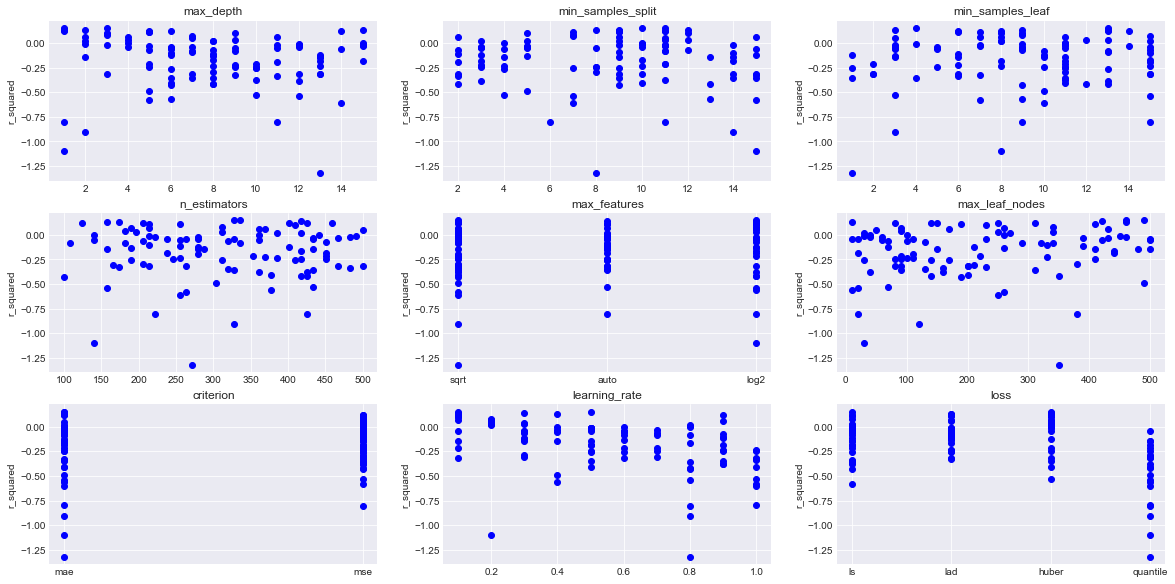

In [35]:
out2 = out

xlabel_names = ['param_max_depth','param_min_samples_split','param_min_samples_leaf','param_n_estimators',
                'param_max_features', 'param_max_leaf_nodes', 'param_criterion']

fig, axs = plt.subplots(3,3, figsize=(20,10))

axs[0,0].scatter(out2['param_max_depth'], out2['mean_test_score'], c='blue');
axs[0,0].set_title('max_depth')

axs[0,1].scatter(out2['param_min_samples_split'], out2['mean_test_score'], c='blue');
axs[0,1].set_title('min_samples_split')

axs[0,2].scatter(out2['param_min_samples_leaf'], out2['mean_test_score'], c='blue');
axs[0,2].set_title('min_samples_leaf')

axs[1,0].scatter(out2['param_n_estimators'], out2['mean_test_score'], c='blue');
axs[1,0].set_title('n_estimators')

axs[1,1].scatter(out2['param_max_features'], out2['mean_test_score'], c='blue');
axs[1,1].set_title('max_features')

axs[1,2].scatter(out2['param_max_leaf_nodes'], out2['mean_test_score'], c='blue');
axs[1,2].set_title('max_leaf_nodes')

axs[2,0].scatter(out2['param_criterion'], out2['mean_test_score'], c='blue');
axs[2,0].set_title('criterion')

axs[2,1].scatter(out2['param_learning_rate'], out2['mean_test_score'], c='blue');
axs[2,1].set_title('learning_rate')

axs[2,2].scatter(out2['param_loss'], out2['mean_test_score'], c='blue');
axs[2,2].set_title('loss')


for ax in axs.flat: ax.set(ylabel='r_squared')

It is hard to see anything on these graphs. We will zoom in on the R^2 above 0.6.

__note__: We don't choose a R2 of 0.7 because otherwise we can't declare why to choose and try that hyperparameter.

In [36]:
out2 = out[out.mean_test_score > 0.14]

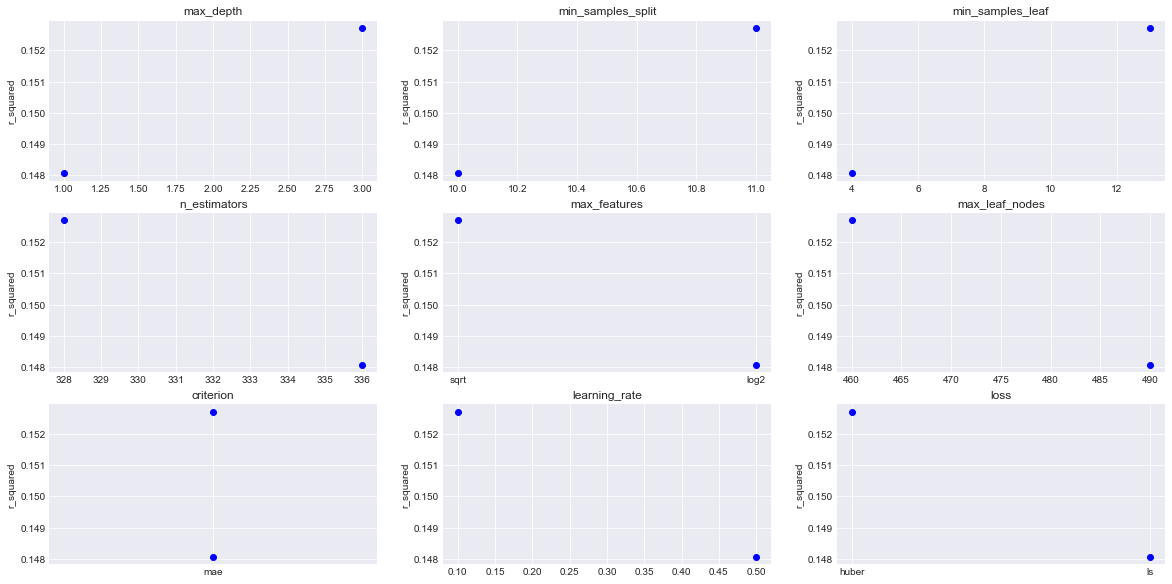

In [37]:
xlabel_names = ['param_max_depth','param_min_samples_split','param_min_samples_leaf','param_n_estimators',
                'param_max_features', 'param_max_leaf_nodes', 'param_criterion']

fig, axs = plt.subplots(3,3, figsize=(20,10))

axs[0,0].scatter(out2['param_max_depth'], out2['mean_test_score'], c='blue');
axs[0,0].set_title('max_depth')

axs[0,1].scatter(out2['param_min_samples_split'], out2['mean_test_score'], c='blue');
axs[0,1].set_title('min_samples_split')

axs[0,2].scatter(out2['param_min_samples_leaf'], out2['mean_test_score'], c='blue');
axs[0,2].set_title('min_samples_leaf')

axs[1,0].scatter(out2['param_n_estimators'], out2['mean_test_score'], c='blue');
axs[1,0].set_title('n_estimators')

axs[1,1].scatter(out2['param_max_features'], out2['mean_test_score'], c='blue');
axs[1,1].set_title('max_features')

axs[1,2].scatter(out2['param_max_leaf_nodes'], out2['mean_test_score'], c='blue');
axs[1,2].set_title('max_leaf_nodes')

axs[2,0].scatter(out2['param_criterion'], out2['mean_test_score'], c='blue');
axs[2,0].set_title('criterion')

axs[2,1].scatter(out2['param_learning_rate'], out2['mean_test_score'], c='blue');
axs[2,1].set_title('learning_rate')

axs[2,2].scatter(out2['param_loss'], out2['mean_test_score'], c='blue');
axs[2,2].set_title('loss')


for ax in axs.flat: ax.set(ylabel='r_squared')

## 4.5 Grid search

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

criterion =['mae']
n_estimators = [328, 336]
max_features = ['log2', 'sqrt']
max_depth = [1,3]
min_samples_split = [10, 11]
min_samples_leaf = [4,13]
max_leaf_nodes = [460, 490]
learning_rate = [0.5, 0.1]
loss = ['ls', 'huber']

# create the random grid to search for best hyperparameters
grid = {'criterion': criterion,
               'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
            'max_leaf_nodes': max_leaf_nodes,
               'learning_rate': learning_rate,
               'loss':loss}

gbm = GradientBoostingRegressor()
gbm_grid = GridSearchCV(estimator = gbm, param_grid = grid,
                               cv = 5, verbose=10,  n_jobs=-1)
gbm_grid.fit(X_train_damage, y_train_damage)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits


C:\Users\pierl\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1630: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='lad' instead.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mae'], 'learning_rate': [0.5, 0.1],
                         'loss': ['ls', 'huber'], 'max_depth': [1, 3],
                         'max_features': ['log2', 'sqrt'],
                         'max_leaf_nodes': [460, 490],
                         'min_samples_leaf': [4, 13],
                         'min_samples_split': [10, 11],
                         'n_estimators': [328, 336]},
             verbose=10)

In [39]:
gbm_grid.best_params_

{'criterion': 'mae',
 'learning_rate': 0.5,
 'loss': 'huber',
 'max_depth': 1,
 'max_features': 'sqrt',
 'max_leaf_nodes': 490,
 'min_samples_leaf': 13,
 'min_samples_split': 10,
 'n_estimators': 336}

In [40]:
params = gbm_grid.best_params_
gbm_gridBest = GradientBoostingRegressor(**params)
gbm_gridBest.fit(X_train_damage, y_train_damage)
print('R2: %.3f' % gbm_gridBest.score(X_train_damage, y_train_damage))

C:\Users\pierl\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1630: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='lad' instead.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "


R2: 0.318


We see the random grid is doing doing better then this one, so we'll keep the random grid

# 5. choosing and using the best model

random forest has the best R^2 so this will be our model

In [41]:
df_test = pd.read_csv('score_with_profit_and_damage_inc_results.csv', index_col=[0])

damagers_test = df_test[df_test['outcome_damage_inc'] == 1].copy()
no_damagers = df_test[df_test['outcome_damage_inc'] == 0].copy()

damagers_wout_results = damagers_test.drop(['outcome_profit', 'outcome_damage_inc'],1)

In [42]:
outcome_damage_amount = rf_gridBest.predict(damagers_wout_results)

damagers_test['outcome_damage_amount'] = outcome_damage_amount
no_damagers['outcome_damage_amount'] = 0

df_result = pd.concat([damagers_test,no_damagers])
df_result.to_csv('score_with_all_results.csv')